In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [42]:
btc = pd.read_csv('ML_historical_data.csv')

In [43]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1820 non-null   int64  
 1   date                              1820 non-null   object 
 2   hash-rate                         1820 non-null   float64
 3   market-price                      1820 non-null   float64
 4   difficulty                        1820 non-null   float64
 5   avg-block-size                    1820 non-null   float64
 6   total-bitcoins                    1820 non-null   float64
 7   cost-per-transaction              1820 non-null   float64
 8   blocks-size                       1820 non-null   float64
 9   miners-revenue                    1820 non-null   float64
 10  transaction-fees                  1820 non-null   float64
 11  n-transactions-per-block          1820 non-null   float64
 12  n-tran

In [44]:
btc.head()

,Unnamed: 0,date,hash-rate,market-price,difficulty,avg-block-size,total-bitcoins,cost-per-transaction,blocks-size,miners-revenue,...,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
0,0,2018-04-29,3.159015e+07,9349.41,4.022059e+12,0.623490,17004225.0,104.969929,166822.561778,1.906296e+07,...,9348.00,9570.51,9163.74,9419.00,38149.850035,2018-04-29 23:59:59.999000064,3.570049e+08,311494,19364.945182,1.813667e+08
1,1,2018-04-30,3.099034e+07,9398.40,4.022059e+12,0.748397,17006450.0,85.330234,166921.216729,1.835513e+07,...,9417.04,9458.64,9124.99,9246.01,35002.033875,2018-04-30 23:59:59.999000064,3.250194e+08,285951,17461.189029,1.621791e+08
2,2,2018-05-01,3.159015e+07,9239.55,4.022059e+12,0.673272,17008662.5,90.066350,167037.514484,1.826185e+07,...,9246.01,9248.99,8800.49,9071.48,41018.463633,2018-05-01 23:59:59.999000064,3.686883e+08,268741,20050.167844,1.802000e+08
3,3,2018-05-02,2.799127e+07,9074.98,4.022059e+12,0.877978,17010900.0,77.551955,167143.624048,1.655029e+07,...,9071.48,9268.00,8970.20,9247.84,26123.543961,2018-05-02 23:59:59.999000064,2.384218e+08,188258,13960.455528,1.274396e+08
4,4,2018-05-03,3.019058e+07,9220.76,4.022059e+12,0.867925,17013112.5,79.051902,167266.980876,1.806502e+07,...,9247.81,9844.00,9168.40,9750.00,38768.388288,2018-05-03 23:59:59.999000064,3.660284e+08,282581,21093.140343,1.992344e+08


In [45]:
btc.columns

Index(['Unnamed: 0', 'date', 'hash-rate', 'market-price', 'difficulty',
       'avg-block-size', 'total-bitcoins', 'cost-per-transaction',
       'blocks-size', 'miners-revenue', 'transaction-fees',
       'n-transactions-per-block', 'n-transactions',
       'cost-per-transaction-percent', 'estimated-transaction-volume-usd',
       'market-cap', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'Number of Trades', 'TB Base Volume',
       'TB Quote Volume'],
      dtype='object')

In [47]:
btc.drop(["Unnamed: 0",'hash-rate','avg-block-size','cost-per-transaction','transaction-fees','n-transactions-per-block',
          'n-transactions','cost-per-transaction-percent','estimated-transaction-volume-usd','Volume','Close Time',
          'Quote Asset Volume','TB Base Volume','TB Quote Volume'],axis=1,inplace=True)
btc

,date,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,Open,High,Low,Close,Number of Trades
0,2018-04-29,9349.41,4.022059e+12,1.700422e+07,166822.561778,1.906296e+07,1.588790e+11,9348.00,9570.51,9163.74,9419.00,311494
1,2018-04-30,9398.40,4.022059e+12,1.700645e+07,166921.216729,1.835513e+07,1.580750e+11,9417.04,9458.64,9124.99,9246.01,285951
2,2018-05-01,9239.55,4.022059e+12,1.700866e+07,167037.514484,1.826185e+07,1.523551e+11,9246.01,9248.99,8800.49,9071.48,268741
3,2018-05-02,9074.98,4.022059e+12,1.701090e+07,167143.624048,1.655029e+07,1.553691e+11,9071.48,9268.00,8970.20,9247.84,188258
4,2018-05-03,9220.76,4.022059e+12,1.701311e+07,167266.980876,1.806502e+07,1.604592e+11,9247.81,9844.00,9168.40,9750.00,282581
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2023-04-23,27816.18,4.871241e+13,1.935402e+07,475475.577912,2.574016e+07,5.322356e+11,27816.85,27816.85,27311.25,27590.60,873485
1816,2023-04-24,27590.55,4.871241e+13,1.935458e+07,475711.067362,2.515156e+07,5.332573e+11,27590.59,28000.00,26942.82,27510.93,1211080
1817,2023-04-25,27516.48,4.871241e+13,1.935569e+07,475952.786800,2.225211e+07,5.302684e+11,27510.93,28399.99,27192.00,28300.79,1087067
1818,2023-04-26,28301.71,4.871241e+13,1.935679e+07,476152.373042,2.438497e+07,5.802005e+11,28300.80,30036.00,27235.00,28415.29,2261942


In [49]:
target = btc['market-price'].values

In [57]:
btc.set_index('date', inplace=True)
btc.head()

KeyError: "None of ['date'] are in the columns"

In [70]:
btc = btc.reset_index(drop=True)
btc.head()

,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,Open,High,Low,Close,Number of Trades
0,9349.41,4.022059e+12,17004225.0,166822.561778,1.906296e+07,1.588790e+11,9348.00,9570.51,9163.74,9419.00,311494
1,9398.40,4.022059e+12,17006450.0,166921.216729,1.835513e+07,1.580750e+11,9417.04,9458.64,9124.99,9246.01,285951
2,9239.55,4.022059e+12,17008662.5,167037.514484,1.826185e+07,1.523551e+11,9246.01,9248.99,8800.49,9071.48,268741
3,9074.98,4.022059e+12,17010900.0,167143.624048,1.655029e+07,1.553691e+11,9071.48,9268.00,8970.20,9247.84,188258
4,9220.76,4.022059e+12,17013112.5,167266.980876,1.806502e+07,1.604592e+11,9247.81,9844.00,9168.40,9750.00,282581


In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc)
btc_scaled

array([[9.50952165e-02, 0.00000000e+00, 0.00000000e+00, ...,
        9.52568209e-02, 9.65150571e-02, 1.64514464e-02],
       [9.58567554e-02, 0.00000000e+00, 9.45551129e-04, ...,
        9.46423865e-02, 9.38252897e-02, 1.47667213e-02],
       [9.33874665e-02, 0.00000000e+00, 1.88579017e-03, ...,
        8.94969947e-02, 9.11115772e-02, 1.36316112e-02],
       ...,
       [3.77498397e-01, 1.00000000e+00, 9.99293493e-01, ...,
        3.81119567e-01, 3.90102110e-01, 6.76054729e-02],
       [3.89704627e-01, 1.00000000e+00, 9.99763612e-01, ...,
        3.81801391e-01, 3.91882435e-01, 1.45096034e-01],
       [3.91694515e-01, 1.00000000e+00, 1.00000000e+00, ...,
        3.99938858e-01, 4.08324861e-01, 1.27169472e-01]])

In [72]:
btc_scaled_df = pd.DataFrame(btc_scaled, columns=btc.columns)
btc_scaled_df

,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,Open,High,Low,Close,Number of Trades
0,0.095095,0.0,0.000000,0.000000,0.190666,0.085105,0.095411,0.095765,0.095257,0.096515,0.016451
1,0.095857,0.0,0.000946,0.000319,0.181291,0.084448,0.096485,0.094063,0.094642,0.093825,0.014767
2,0.093387,0.0,0.001886,0.000694,0.180056,0.079774,0.093825,0.090873,0.089497,0.091112,0.013632
3,0.090829,0.0,0.002837,0.001037,0.157388,0.082237,0.091112,0.091162,0.092188,0.093854,0.008323
4,0.093095,0.0,0.003777,0.001436,0.177449,0.086396,0.093853,0.099926,0.095331,0.101662,0.014544
...,...,...,...,...,...,...,...,...,...,...,...
1815,0.382157,1.0,0.998586,0.997138,0.279099,0.390167,0.382578,0.373388,0.383010,0.379060,0.053518
1816,0.378650,1.0,0.998821,0.997899,0.271304,0.391001,0.379060,0.376174,0.377168,0.377821,0.075785
1817,0.377498,1.0,0.999293,0.998680,0.232903,0.388559,0.377821,0.382260,0.381120,0.390102,0.067605
1818,0.389705,1.0,0.999764,0.999324,0.261151,0.429358,0.390102,0.407153,0.381801,0.391882,0.145096


In [73]:
# seq_len = 1
# train_size = int(len(btc_scaled_df) * 0.9)
# train_data = btc_scaled_df.iloc[:train_size]
# test_data = btc_scaled_df.iloc[train_size:]
#data should not be shuffled so as not to interfere with the 1 day lag 
train_data, test_data = train_test_split(btc_scaled_df, test_size=0.1, shuffle=False) 

In [104]:
def create_dataset(data, time_steps):
    print(f"Input data type: {type(data)}")
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        x = data[i:(i + time_steps), :]
        y = data[i + time_steps, 0] # Assuming the target variable (e.g. closing price) is the first column
        print(f"i: {i}, x shape: {x.shape}, y: {y}")
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [105]:
# def create_sequences(data, seq_len):
#     if len(data) < seq_len:
#         raise ValueError("Length of data is less than sequence length")
#     X = []
#     y = []
#     for i in range(seq_len, len(data)):
#         X.append(data.iloc[i-seq_len:i].values)
#         y.append(data.iloc[i].values)
#     X = np.array(X)
#     y = np.array(y)
#     return X, y

In [106]:
# input_cols = ['open', 'high', 'low', 'close',]
# X_train, y_train = create_sequences(train_data[input_cols], seq_len)
# X_test, y_test = create_sequences(test_data[input_cols], seq_len)

In [113]:
time_steps = 5 # Adjust this value depending on the desired sequence length
X_train, Y_train = create_dataset(train_data.values, time_steps)
X_test, Y_test = create_dataset(test_data.values, time_steps)

Input data type: <class 'numpy.ndarray'>
i: 0, x shape: (5, 11), y: 0.10137437653757345
i: 1, x shape: (5, 11), y: 0.10048490399385918
i: 2, x shape: (5, 11), y: 0.10268899892523364
i: 3, x shape: (5, 11), y: 0.09947931191324269
i: 4, x shape: (5, 11), y: 0.09540222595089776
i: 5, x shape: (5, 11), y: 0.09256576920410395
i: 6, x shape: (5, 11), y: 0.09448834809621476
i: 7, x shape: (5, 11), y: 0.08991056463940919
i: 8, x shape: (5, 11), y: 0.08028756606921844
i: 9, x shape: (5, 11), y: 0.081324247717948
i: 10, x shape: (5, 11), y: 0.08486752579579188
i: 11, x shape: (5, 11), y: 0.08455740735386427
i: 12, x shape: (5, 11), y: 0.08144145538973416
i: 13, x shape: (5, 11), y: 0.07945498743515106
i: 14, x shape: (5, 11), y: 0.07511161932191787
i: 15, x shape: (5, 11), y: 0.07783537638430188
i: 16, x shape: (5, 11), y: 0.07788185528863087
i: 17, x shape: (5, 11), y: 0.08221138854405377
i: 18, x shape: (5, 11), y: 0.08028445711240711
i: 19, x shape: (5, 11), y: 0.07392275423727496
i: 20, x sh

In [114]:
train_data

,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,Open,High,Low,Close,Number of Trades
0,0.095095,0.000000,0.000000,0.000000,0.190666,0.085105,0.095411,0.095765,0.095257,0.096515,0.016451
1,0.095857,0.000000,0.000946,0.000319,0.181291,0.084448,0.096485,0.094063,0.094642,0.093825,0.014767
2,0.093387,0.000000,0.001886,0.000694,0.180056,0.079774,0.093825,0.090873,0.089497,0.091112,0.013632
3,0.090829,0.000000,0.002837,0.001037,0.157388,0.082237,0.091112,0.091162,0.092188,0.093854,0.008323
4,0.093095,0.000000,0.003777,0.001436,0.177449,0.086396,0.093853,0.099926,0.095331,0.101662,0.014544
...,...,...,...,...,...,...,...,...,...,...,...
1633,0.248305,0.707189,0.927641,0.862353,0.187408,0.255917,0.248664,0.249812,0.252336,0.254356,0.255755
1634,0.253909,0.734244,0.928112,0.862817,0.159426,0.256954,0.254356,0.248384,0.253714,0.250614,0.370334
1635,0.250380,0.734244,0.928347,0.863383,0.140338,0.263555,0.250628,0.260780,0.254982,0.262281,0.471761
1636,0.262231,0.734244,0.928582,0.863856,0.208265,0.270157,0.262265,0.269972,0.267880,0.273033,0.557351


In [115]:
print(X_train.shape, Y_train.shape)

(1632, 5, 11) (1632,)


In [116]:
print(X_test.shape, Y_test.shape)

(176, 5, 11) (176,)


In [117]:
#Gridsearch?
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')

In [118]:
model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
51/51 [==============================] - 6s 16ms/step - loss: 0.0113
Epoch 2/15
51/51 [==============================] - 1s 17ms/step - loss: 7.3092e-04
Epoch 3/15
51/51 [==============================] - 1s 17ms/step - loss: 7.0717e-04
Epoch 4/15
51/51 [==============================] - 1s 17ms/step - loss: 7.8737e-04
Epoch 5/15
51/51 [==============================] - 1s 17ms/step - loss: 6.9305e-04
Epoch 6/15
51/51 [==============================] - 1s 17ms/step - loss: 6.6983e-04
Epoch 7/15
51/51 [==============================] - 1s 17ms/step - loss: 6.4391e-04
Epoch 8/15
51/51 [==============================] - 1s 17ms/step - loss: 6.6666e-04
Epoch 9/15
51/51 [==============================] - 1s 17ms/step - loss: 8.2028e-04
Epoch 10/15
51/51 [==============================] - 1s 17ms/step - loss: 5.9128e-04
Epoch 11/15
51/51 [==============================] - 1s 17ms/step - loss: 6.2042e-04
Epoch 12/15
51/51 [==============================] - 1s 17ms/step - loss: 6.68

In [119]:
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_loss)

Test loss: 0.00026692100800573826


In [120]:
y_pred = model.predict(X_test)

6/6 [==============================] - 2s 10ms/step


In [121]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(Y_test[:, 3], label='actual')
# plt.plot(y_pred[:, 0], label='predicted')
# plt.legend()
# plt.show()

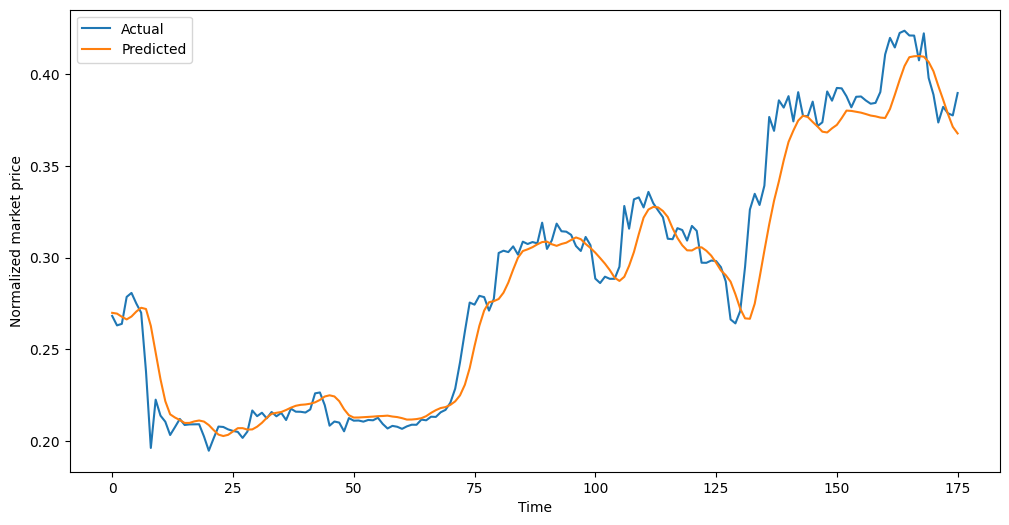

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.show()